In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
data <- read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod", skip = 19, col_names=FALSE) 
colnames(data) <- c("age", "sex", "chest_pain_type", "resting_blood_pres", "cholesteral", "fasting_blood_sugar < 120", "resting_ecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "number_of_vessels_colored", "thal", "healthy_or_sick", "sickness_classifier")

data_selected <- data |>
    select("age", "resting_blood_pres", "cholesteral", "max_heart_rate", "oldpeak", "number_of_vessels_colored", "healthy_or_sick", "sickness_classifier")

data_selected


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_double(),
  X9 = col_character(),
  X10 = col_double(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_character(),
  X15 = col_character()
)



age,resting_blood_pres,cholesteral,max_heart_rate,oldpeak,number_of_vessels_colored,healthy_or_sick,sickness_classifier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
63,145,233,150,2.3,0.0,buff,H
67,160,286,108,1.5,3.0,sick,S2
67,120,229,129,2.6,2.0,sick,S1
37,130,250,187,3.5,0.0,buff,H
41,130,204,172,1.4,0.0,buff,H
56,120,236,178,0.8,0.0,buff,H
62,140,268,160,3.6,2.0,sick,S3
57,120,354,163,0.6,0.0,buff,H
63,130,254,147,1.4,1.0,sick,S2


In [8]:
data_mhr <- select(data_selected, max_heart_rate, healthy_or_sick)

data_mhr

max_heart_rate,healthy_or_sick
<dbl>,<chr>
150,buff
108,sick
129,sick
187,buff
172,buff
178,buff
160,sick
163,buff
147,sick


Graph the Histograms and Box Plot for Max_heart_rate Data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



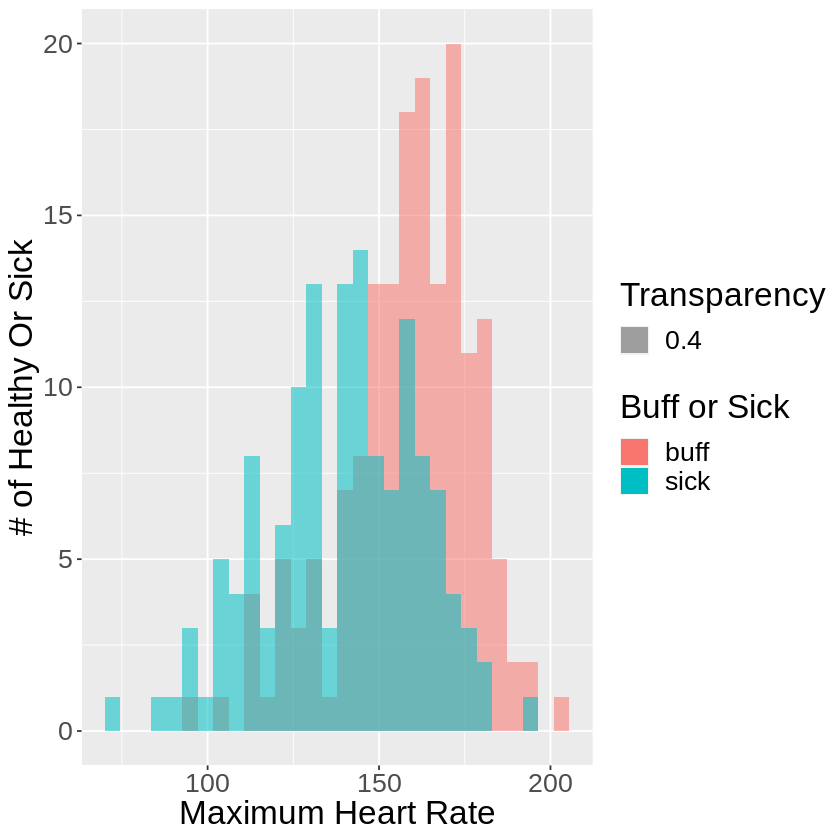

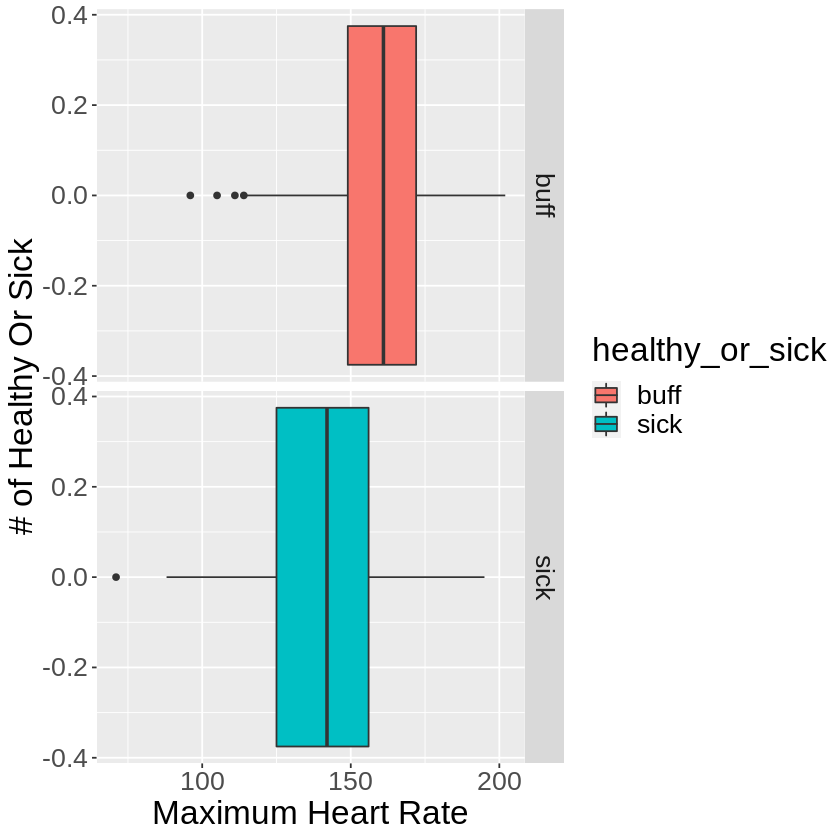

In [10]:
histogram_plot_mhr <- data_mhr |>
    ggplot(aes(x = max_heart_rate, fill = healthy_or_sick, alpha = 0.4)) +
    geom_histogram(position = "identity") +
    labs(x = "Maximum Heart Rate", y = "# of Healthy Or Sick", fill = "Buff or Sick", alpha = "Transparency") +
    theme(text = element_text(size = 20))

box_plot_mhr <- data_mhr |>
    ggplot(aes(x = max_heart_rate, fill = healthy_or_sick)) +
    geom_boxplot() +
    labs(x = "Maximum Heart Rate", y = "# of Healthy Or Sick") +
    theme(text = element_text(size = 20)) +
    facet_grid(rows = vars(healthy_or_sick))

histogram_plot_mhr
box_plot_mhr

Max_heart_rate seems to be a good parameter to use for the project, since it strongly indicates that healthy people tend to have higher maximum heart rate. (Fun fact from google sources: To estimate your maximum age-related heart rate, subtract your age from 220. For example, for a 50-year-old person, the estimated maximum age-related heart rate would be calculated as 220 – 50 years = 170 beats per minute (bpm).)

Therefore, generally if you are younger, your maximum heart rate is higher; and also from what we all know, young people are healthier than older elderly people.

Hence, in my opinion, age and max_hear_rate are closely related and can be used as our predictors in the future.